In [49]:
# Implementation of the Mathematical Formulation of Adaboost Algorithm from scratch
# Author: Muhamamad Humayun Khan

import numpy as np        # Linear Algebra
import pandas as pd       # read data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions            # to plot the decision boundry
import seaborn as sns
from sklearn.model_selection import train_test_split          # for training and testing of data


In [50]:
df = pd.DataFrame()                   # creating own data frame

df['X1'] = [1,2,3,4,5,6,6,7,9,9]      # feature one data insertion
df['X2'] = [5,3,6,8,1,9,5,8,9,2]      # feature two data insertion
df['label'] = [1,1,0,1,0,1,0,1,0,0]   # target feature

df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

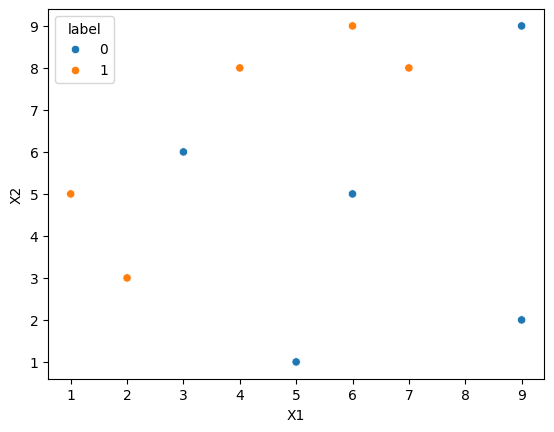

In [51]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [52]:
# assign weight to each row and assigning weight is 1 divided by the total rows
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [53]:
# create decision tree classifier object and
dt1 = DecisionTreeClassifier(max_depth=1)   # max_depth = should be 1 as decision stumps are used in adaboost

# extract X and y
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

# Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

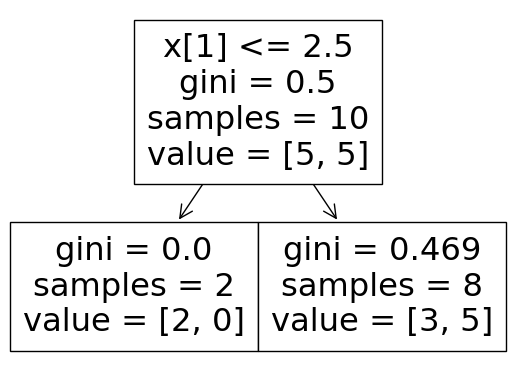

In [54]:
# plot the first model tree
plot_tree(dt1)

<Axes: >

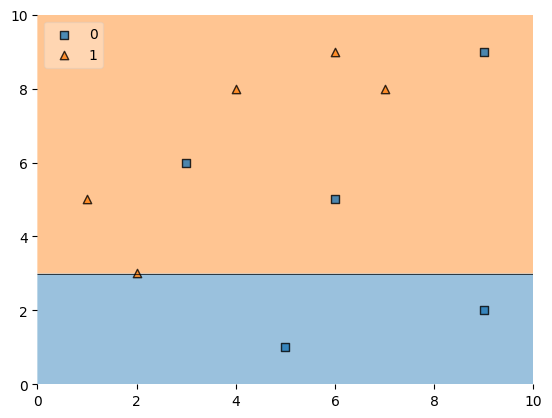

In [55]:
# now plot the boundry
plot_decision_regions(X, y, clf=dt1, legend=2)

In [56]:
# predict the model
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [57]:
# Now calculate the error by the trained model
# The error should be forwareded to the next model or decision stumps or stage 2
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [58]:
# calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [59]:
# Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [60]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [61]:
df['updated_weights'].sum()     # the sum should be equal to 1 otherwise normalized

0.9165153319682015

In [62]:
# for normalization, divide each and every updated value with the total
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [63]:
df['nomalized_weights'].sum()     # normalized weight should be 1

1.0

In [64]:
# Normalized weight is the new weight for the next stage
# find the lower and upper range, from which the rows will be picked for the stage 2
# Pick 5 random numbers between 0 and 1 and it will prove which rows to be picked for the next stage

df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])   # upper range
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']   # lower range
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]  # Stage 2 updated table


,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [65]:
# the random rows will be stored in the new dataset
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [66]:
index_values = create_new_dataset(df)

index_values

[1, 8, 1, 4, 2, 6, 4, 6, 2, 5]

In [67]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
1,2,3,1,0.1
8,9,9,0,0.1
1,2,3,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1


In [68]:
# process repeat for the second decision stump
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]')]

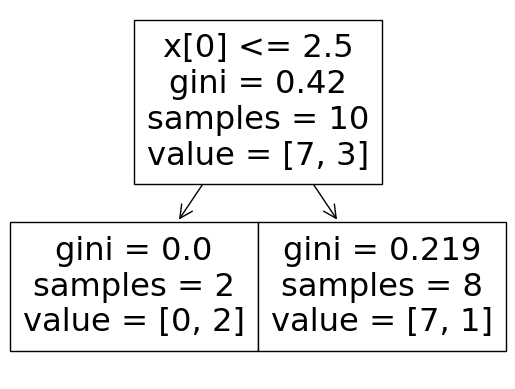

In [69]:
plot_tree(dt2)

<Axes: >

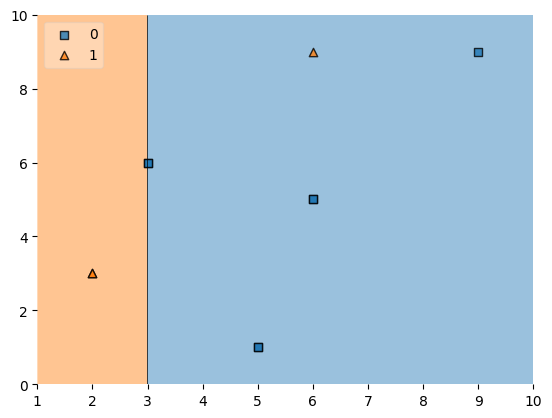

In [70]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [71]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
8,9,9,0,0.1,0
1,2,3,1,0.1,1
4,5,1,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0


In [72]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [73]:
# Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
1,2,3,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427


In [74]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
1,2,3,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,0,0.297427,0.495694


In [75]:
second_df['nomalized_weights'].sum()

1.0

In [76]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.056034,0.000000,0.056034
8,9,9,0,0.1,0,0.056034,0.056034,0.112068
1,2,3,1,0.1,1,0.056034,0.112068,0.168102
4,5,1,0,0.1,0,0.056034,0.168102,0.224136
2,3,6,0,0.1,0,0.056034,0.224136,0.280170
6,6,5,0,0.1,0,0.056034,0.280170,0.336204
4,5,1,0,0.1,0,0.056034,0.336204,0.392238
6,6,5,0,0.1,0,0.056034,0.392238,0.448272
2,3,6,0,0.1,0,0.056034,0.448272,0.504306
5,6,9,1,0.1,0,0.495694,0.504306,1.000000


In [77]:
index_values = create_new_dataset(second_df)
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1


In [78]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

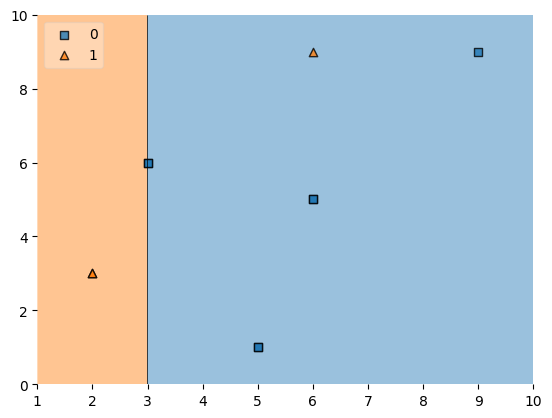

In [79]:
plot_decision_regions(X, y, clf=dt3, legend=2)


In [80]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0


In [81]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [82]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


**Prediction**

In [83]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [84]:
dt2.predict(query)

array([1])

In [85]:
dt3.predict(query)

array([1])

In [86]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [87]:
np.sign(1.09)

1.0

In [88]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)


array([1])

In [89]:
dt2.predict(query)

array([0])

In [90]:
dt3.predict(query)

array([0])

In [91]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [92]:
np.sign(-0.25)

-1.0